In [38]:
#Import various libraries required
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.formatters import DatetimeTickFormatter
from collections import OrderedDict
from PIL import Image
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [39]:
# Pulling the data from the API and using json library to read and convert the data into a usable format

response = requests.get("https://webhooks.mongodb-stitch.com/api/client/v2.0/app/covid-19-qppza/service/REST-API/incoming_webhook/global?country=Kenya&hide_fields=_id, country, country_code, country_iso2, country_iso3, loc, state, uid'").text
response_info = json.loads(response)

In [40]:
#Create a list with Covid Cases data we need by looping through the imported data

covid_cases = []
for country_info in response_info:
    covid_cases.append(
        [country_info["confirmed"], country_info["deaths"], country_info["recovered"], country_info["confirmed_daily"],
         country_info["deaths_daily"], country_info["recovered_daily"], country_info["date"]])

In [41]:
#Convert list data to Dataframe for further data analysis

covid_df = pd.DataFrame(data=covid_cases, columns=["confirmed", "deaths", "recovered", "confirmed_daily", "deaths_daily", "recovered_daily", "date"])

covid_df.tail(5)

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date
885,331966,5651,0,427,0,0,2022-06-25T00:00:00.000Z
886,332227,5652,0,261,1,0,2022-06-26T00:00:00.000Z
887,332459,5652,0,232,0,0,2022-06-27T00:00:00.000Z
888,332898,5652,0,439,0,0,2022-06-28T00:00:00.000Z
889,333290,5652,0,392,0,0,2022-06-29T00:00:00.000Z


In [42]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   confirmed        890 non-null    int64 
 1   deaths           890 non-null    int64 
 2   recovered        890 non-null    int64 
 3   confirmed_daily  890 non-null    int64 
 4   deaths_daily     890 non-null    int64 
 5   recovered_daily  890 non-null    int64 
 6   date             890 non-null    object
dtypes: int64(6), object(1)
memory usage: 48.8+ KB


In [43]:
# Missing values for every column
covid_df.isna().sum()

confirmed          0
deaths             0
recovered          0
confirmed_daily    0
deaths_daily       0
recovered_daily    0
date               0
dtype: int64

In [44]:
covid_df.head(5)

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date
0,0,0,0,0,0,0,2020-01-22T00:00:00.000Z
1,0,0,0,0,0,0,2020-01-23T00:00:00.000Z
2,0,0,0,0,0,0,2020-01-24T00:00:00.000Z
3,0,0,0,0,0,0,2020-01-25T00:00:00.000Z
4,0,0,0,0,0,0,2020-01-26T00:00:00.000Z


In [45]:
df_last_entry = covid_df.iloc[-1:]
df_last_entry

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date
889,333290,5652,0,392,0,0,2022-06-29T00:00:00.000Z


- Noticed the last present total recovered data is 0. This is odd need to investigate further.

In [46]:
# Get the largest value of recovered cases
df_recovered = covid_df["recovered"].max()
df_recovered

191188

- Noticed that the largest recovered number is way lower than the total confirmed cases and doesn't match the death cases

In [47]:
# Get Index of the max value of recovered
recovered_date = covid_df["recovered"].idxmax()
recovered_date

560

In [48]:
# Print afew values above and below the 560 index for further evaluation
df_investigating = covid_df.loc[[557,558,559,560,561,562,563]]
df_investigating

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date
557,203680,3946,189131,467,15,195,2021-08-01T00:00:00.000Z
558,204271,3970,189692,591,24,561,2021-08-02T00:00:00.000Z
559,205356,3995,190095,1085,25,403,2021-08-03T00:00:00.000Z
560,206691,4025,191188,1335,30,1093,2021-08-04T00:00:00.000Z
561,208262,4057,0,1571,32,-191188,2021-08-05T00:00:00.000Z
562,209823,4088,0,1561,31,0,2021-08-06T00:00:00.000Z
563,211028,4117,0,1205,29,0,2021-08-07T00:00:00.000Z


- Last recovered date is 2021-08-04. Recovered daily from there is inaccurate
- Need to get new recovery Data for use

In [49]:
# Pulling data from a different API source using json library

response1 = requests.get("https://api.coronatracker.com/v5/analytics/newcases/country?countryCode=KE&startDate=2020-01-22&endDate=2023-05-21").text
response_info_1 = json.loads(response1)

In [50]:
# Import data for recovered Covid Cases

covid_cases_1 = []
for country_info in response_info_1:
    covid_cases_1.append(
        [country_info["new_recovered"], country_info["last_updated"]])

In [51]:
#Convert list data to Dataframe for further data analysis

covid_df_1 = pd.DataFrame(data=covid_cases_1, columns=["new_recovered", "date"])

covid_df_1.head

<bound method NDFrame.head of      new_recovered                      date
0                0  2020-03-13T00:00:00.000Z
1                0  2020-03-14T00:00:00.000Z
2                0  2020-03-15T00:00:00.000Z
3                0  2020-03-16T00:00:00.000Z
4                0  2020-03-17T00:00:00.000Z
..             ...                       ...
831              0  2022-06-26T00:00:00.000Z
832            816  2022-06-27T00:00:00.000Z
833              0  2022-06-28T00:00:00.000Z
834            644  2022-06-29T00:00:00.000Z
835            252  2022-06-30T00:00:00.000Z

[836 rows x 2 columns]>

In [52]:
# Get the total of the recovery data
Total = covid_df_1['new_recovered'].sum()
print (Total)

323953


- Total recovered looks more accurate

## Merging the data
- New recovered has data starting 13-03-2020
- Merge with existing data frame which starts from date 2020-01-22

In [53]:
# Join the 2 using pd.merge and the common column "date"
covid_df_merged = pd.merge(covid_df, covid_df_1, how='inner', on='date')
covid_df_merged.tail(5)

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date,new_recovered
830,331966,5651,0,427,0,0,2022-06-25T00:00:00.000Z,467
831,332227,5652,0,261,1,0,2022-06-26T00:00:00.000Z,0
832,332459,5652,0,232,0,0,2022-06-27T00:00:00.000Z,816
833,332898,5652,0,439,0,0,2022-06-28T00:00:00.000Z,0
834,333290,5652,0,392,0,0,2022-06-29T00:00:00.000Z,644


In [54]:
covid_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 834
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   confirmed        835 non-null    int64 
 1   deaths           835 non-null    int64 
 2   recovered        835 non-null    int64 
 3   confirmed_daily  835 non-null    int64 
 4   deaths_daily     835 non-null    int64 
 5   recovered_daily  835 non-null    int64 
 6   date             835 non-null    object
 7   new_recovered    835 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 58.7+ KB


In [55]:
# Date is given as an object. Convert to Date format and remove the time format

covid_df_merged["Report_Date"] =  pd.to_datetime(pd.to_datetime(covid_df_merged["date"]).dt.date).dt.normalize()

In [56]:
covid_df_merged.tail(50)

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date,new_recovered,Report_Date
785,323939,5649,0,18,0,0,2022-05-11T00:00:00.000Z,13,2022-05-11
786,323952,5649,0,13,0,0,2022-05-12T00:00:00.000Z,6,2022-05-12
787,323975,5649,0,23,0,0,2022-05-13T00:00:00.000Z,0,2022-05-13
788,324011,5649,0,36,0,0,2022-05-14T00:00:00.000Z,14,2022-05-14
789,324026,5649,0,15,0,0,2022-05-15T00:00:00.000Z,12,2022-05-15
790,324046,5649,0,20,0,0,2022-05-16T00:00:00.000Z,28,2022-05-16
791,324071,5649,0,25,0,0,2022-05-17T00:00:00.000Z,22,2022-05-17
792,324097,5649,0,26,0,0,2022-05-18T00:00:00.000Z,13,2022-05-18
793,324129,5649,0,32,0,0,2022-05-19T00:00:00.000Z,19,2022-05-19
794,324175,5649,0,46,0,0,2022-05-20T00:00:00.000Z,21,2022-05-20


In [57]:
# Getting Latest Report Date in DD-MM-YYYY Format for use in the app
df_date = covid_df_merged["Report_Date"].dt.strftime('%d-%m-%Y')[covid_df_merged.index[-1]]
df_date

'29-06-2022'

## Do some Interesting Data Computations
- Compute confirmed covid cases in terms of year and month
- Use the new data to create a plot to show covid  confirmed cases distributions comparatively in the 3 years

In [58]:
 # Group data by Year and Month
df_covid_monthly = covid_df_merged.groupby([covid_df_merged.Report_Date.dt.year, covid_df_merged.Report_Date.dt.month])['confirmed_daily'].mean().unstack(level=0)
df_covid_monthly.iloc[:, :5]

Report_Date,2020,2021,2022
Report_Date,,,
1,NaN,139.193548,850.096774
2,NaN,181.560000,55.892857
3,2.833333,905.967742,15.387097
4,11.233333,842.000000,11.666667
5,50.516129,368.290323,38.806452
6,146.800000,447.533333,286.689655
7,460.322581,614.580645,NaN
8,437.580645,1053.225806,NaN
9,144.266667,452.366667,NaN


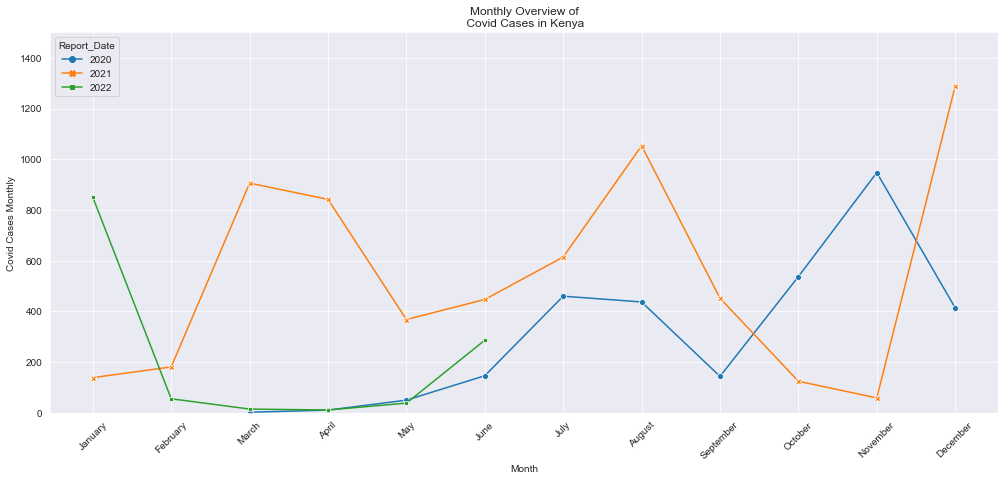

In [59]:
# PLot in a graph
ix = list(range(0, len(df_covid_monthly.columns), 10))

with sns.axes_style("darkgrid"):
    for i in ix:
        plt.figure(figsize=(17, 7))
        data = df_covid_monthly.iloc[:, i:i+10]
        sns.lineplot(data=data, markers=True, dashes=False)
        
        plt.xticks(np.arange(1, 13), calendar.month_name[1:13], rotation=45)
        plt.ylim(0,1500)
        plt.xlabel('Month')
        plt.ylabel('Covid Cases Monthly')
        plt.title(f"Monthly Overview of\n Covid Cases in Kenya")
        plt.show()

In [60]:
# Get the latest Total recorded Confirmed cases
df_covid_confirmed = covid_df_merged["confirmed"][covid_df_merged.index[-1]]
df_covid_confirmed

333290

In [61]:
# Get the latest Total recorded Death cases
df_covid_deaths = covid_df_merged["deaths"][covid_df_merged.index[-1]]
df_covid_deaths

5652

In [62]:
# Get the latest Total Recovered cases
df_covid_recovered = covid_df_merged['new_recovered'].sum()
df_covid_recovered

323701

## Create a stacked bar graph of 2 weeks daily using Bokeh

In [63]:
# Get Last 2 weeks Dataframe Data
covid_df_merged_last_2weeks = covid_df_merged[-14:]
covid_df_merged_last_2weeks

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date,new_recovered,Report_Date
821,328319,5651,0,427,0,0,2022-06-16T00:00:00.000Z,80,2022-06-16
822,328709,5651,0,390,0,0,2022-06-17T00:00:00.000Z,163,2022-06-17
823,329107,5651,0,398,0,0,2022-06-18T00:00:00.000Z,218,2022-06-18
824,329353,5651,0,246,0,0,2022-06-19T00:00:00.000Z,202,2022-06-19
825,329605,5651,0,252,0,0,2022-06-20T00:00:00.000Z,232,2022-06-20
826,330024,5651,0,419,0,0,2022-06-21T00:00:00.000Z,288,2022-06-21
827,330478,5651,0,454,0,0,2022-06-22T00:00:00.000Z,195,2022-06-22
828,331037,5651,0,559,0,0,2022-06-23T00:00:00.000Z,213,2022-06-23
829,331539,5651,0,502,0,0,2022-06-24T00:00:00.000Z,280,2022-06-24
830,331966,5651,0,427,0,0,2022-06-25T00:00:00.000Z,467,2022-06-25


In [64]:
# Drop unwanted columns for Bokeh drawing
covid_df_bokeh_data_last_2weeks = covid_df_merged_last_2weeks.drop(['confirmed', 'deaths', 'recovered', 'recovered_daily', 'date'], axis = 1)

# Covert Dataframe to Dictionary with Keys and Values for use in Bokey Graph
bi_weekly_dict = covid_df_bokeh_data_last_2weeks.to_dict('list')

In [65]:
# Y column Data to be stacked
df_daily_covid_cases = ["confirmed_daily", "new_recovered", "deaths_daily"]

# Labels and Color for Y Data
lables = ["Confirmed Daily", "New Recovered", "Deaths Daily"]
colors = ["blue", "green", "red"]

# Calling the Dictionary created earlier
source = ColumnDataSource(data=bi_weekly_dict)


# Plotting the Stacked Bar Graph
p = figure(x_axis_type='datetime', y_range=(0,1300), height=450, title="Daily Covid Cases", 
           toolbar_location=None, tools='hover', tooltips='$name @Report_Date: @$name')

p.vbar_stack(df_daily_covid_cases, x="Report_Date", source=source, width=1, alpha=1, muted_alpha=0.2, 
             color=colors, legend_label=lables)

p.width = 1000
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 3.142/4
p.xaxis.axis_label = "Date"
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = "black"
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.xaxis.formatter = DatetimeTickFormatter(months="%d/%m", days="%d/%m")
p.legend.click_policy = "mute"


show(p)

SyntaxError: invalid syntax (2182050642.py, line 14)

## Build a Web app round this data using streamlit and host on heroku

# THE END